# Logistic Regression

Logistic regression is a supervised learning algorithm that classify an object into one of two classes. That type of classifier is called a binary classifier.

Good introducion at [deeplearning.stanford.edu](http://deeplearning.stanford.edu/tutorial/supervised/LogisticRegression/)

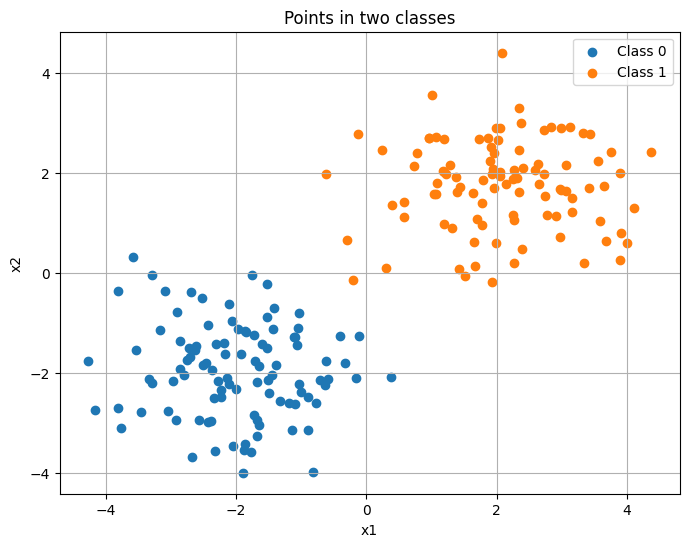

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()
class_0 = rng.normal(size=(100,2), scale=2) * 0.5 + [-2, -2]
class_1 = rng.normal(size=(100,2), scale=2) * 0.5 + [2, 2]


plt.figure(figsize=(8, 6))
plt.scatter(class_0[:, 0], class_0[:, 1], label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], label='Class 1')
plt.title('Points in two classes')
plt.xlabel('x1'), plt.ylabel('x2'), plt.grid(True), plt.legend()
plt.show()

## Logistic (sigmoid) function

$\sigma(z) = \frac{1}{1+e^{-z}} \newline $
$z = \sum_i (w_ix_i) $

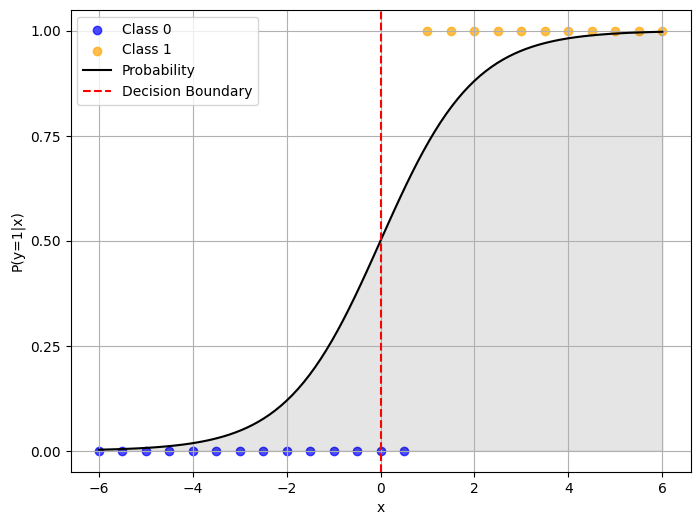

In [2]:
x = np.linspace(-6, 6, 100)
probability = 1 / (1 + np.exp(-x))

x_ = np.linspace(-6, 6, 25)
y = rng.binomial(1, 1 / (1 + np.exp(-x_))) # points

plt.figure(figsize=(8, 6))
plt.scatter(x_[y == 0], y[y == 0], color='blue', label='Class 0', alpha=0.7)
plt.scatter(x_[y == 1], y[y == 1], color='orange', label='Class 1', alpha=0.7)
plt.plot(x, probability, color='black', label='Probability')

plt.fill_between(x, probability, color='black', alpha=0.1)
plt.axvline(0, linestyle='--', color='red', label='Decision Boundary')
plt.yticks(np.linspace(0, 1, 5))
plt.xlabel('x'), plt.ylabel('P(y=1|x)'), plt.grid(), plt.legend()
plt.show()

### 2D decision boundary: <br>
$\sigma(z) = \sigma(w_2x_2 + w_1x_1 + w_0) =  0.5 \newline$
$\sigma(0) = 0.5 \Rightarrow  w_2x_2 + w_1x_1 + w_0 = 0$

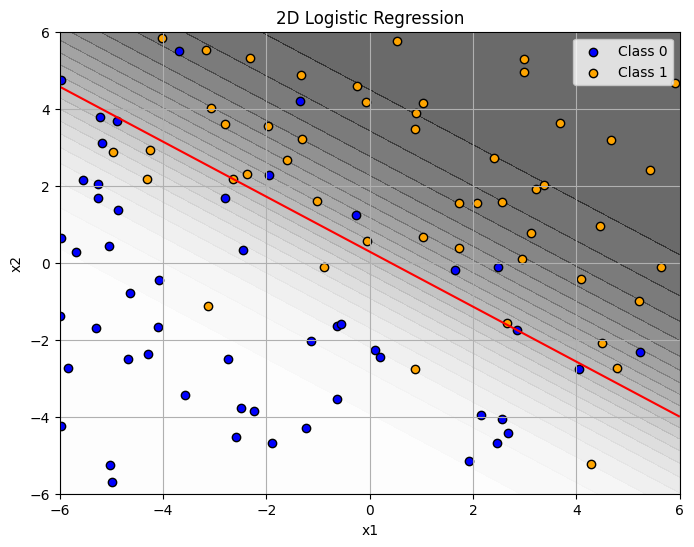

In [3]:
x1, x2 = rng.uniform(-6, 6, 100), rng.uniform(-6, 6, 100)
probability = 1 / (1 + np.exp(-(0.5 * x1 + 0.7 * x2 - 0.2)))
y = rng.binomial(1, probability)

xx1, xx2 = np.meshgrid(np.linspace(-6, 6, 100), np.linspace(-6, 6, 100))
prob_grid = 1 / (1 + np.exp(-(0.5 * xx1 + 0.7 * xx2 - 0.2)))

plt.figure(figsize=(8, 6))
plt.contourf(xx1, xx2, prob_grid, levels=20, cmap='Greys', alpha=0.6)
plt.contour(xx1, xx2, prob_grid, levels=[0.5], colors='red')

plt.scatter(x1[y == 0], x2[y == 0], color='blue', label='Class 0', edgecolors='k')
plt.scatter(x1[y == 1], x2[y == 1], color='orange', label='Class 1', edgecolors='k')

plt.title('2D Logistic Regression')
plt.xlabel('x1'), plt.ylabel('x2'), plt.legend(), plt.grid(True)
plt.show()

## Iris Dataset

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

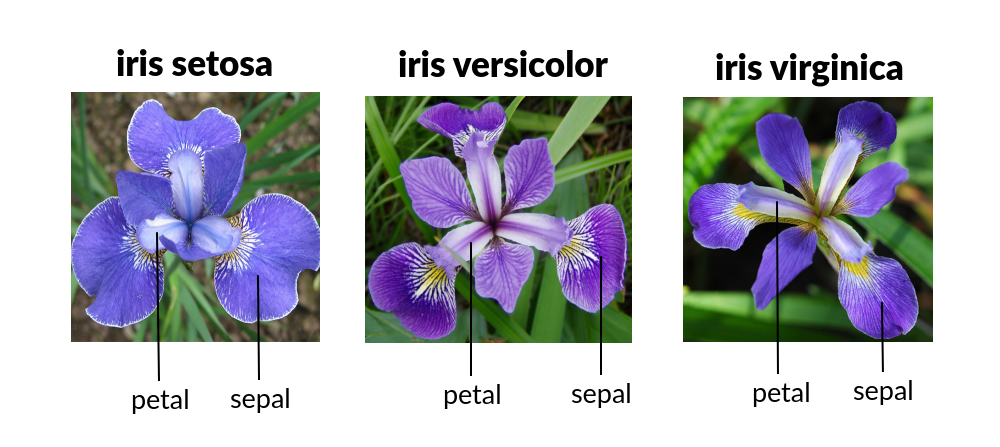

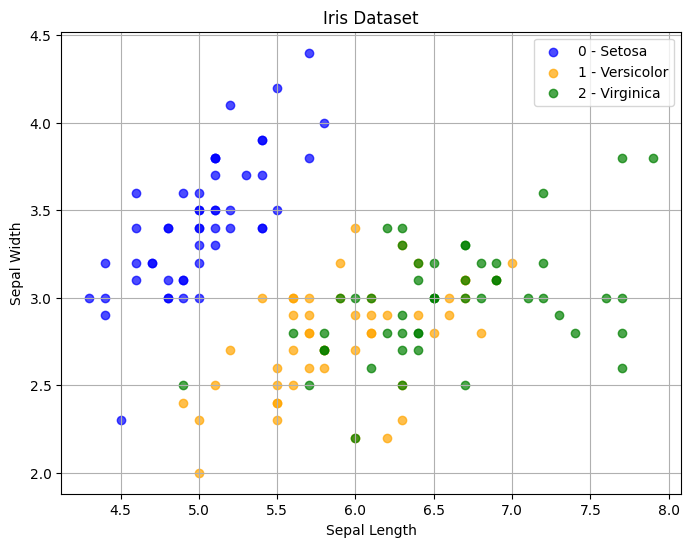

(<matplotlib.legend.Legend at 0x231ac16d1d0>, None, None)

In [5]:
x = iris.data[:, :2] # Sepal length and sepal width
y = iris.target

plt.figure(figsize=(8, 6))
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='blue', label='0 - Setosa', alpha=0.7)
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='orange', label='1 - Versicolor', alpha=0.7)
plt.scatter(x[y == 2][:, 0], x[y == 2][:, 1], color='green', label='2 - Virginica', alpha=0.7)

plt.title('Iris Dataset'), plt.xlabel('Sepal Length'), plt.ylabel('Sepal Width')
plt.legend(), plt.grid(), plt.show()

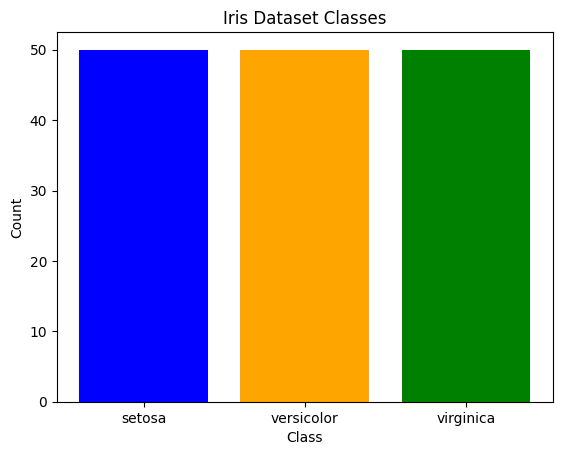

In [6]:
unique, counts = np.unique(iris.target, return_counts=True)

plt.bar(unique, counts, color=['blue','orange', 'green'])
plt.xticks(unique, iris.target_names)
plt.title('Iris Dataset Classes'), plt.xlabel('Class'), plt.ylabel('Count')
plt.show()

### We limit the data to 2 classes and 2 variables

In [8]:
dropped_class = 0

x = iris.data[iris.target != dropped_class, :2] # only two classes and only sepal length and sepal width
y = iris.target
y = iris.target[iris.target != dropped_class]  # only two classes

### Split data in train and test batches

In [9]:
from sklearn.model_selection import train_test_split

iris_train_data, iris_test_data, \
iris_train_target, iris_test_target = \
train_test_split(x, y, test_size=0.2)

print("Training dataset:")
print("iris_train_data:", iris_train_data.shape)
print("iris_train_target:", iris_train_target.shape)

print("Testing dataset:")
print("iris_test_data:", iris_test_data.shape)
print("iris_test_target:", iris_test_target.shape)

Training dataset:
iris_train_data: (80, 2)
iris_train_target: (80,)
Testing dataset:
iris_test_data: (20, 2)
iris_test_target: (20,)


### Scale the data

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_train_scaled_data = scaler.fit_transform(iris_train_data)
iris_test_scaled_data = scaler.transform(iris_test_data)

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(iris_train_scaled_data, iris_train_target)

LogisticRegression()

In [14]:
target_names = iris.target_names

id=7
prediction = logistic_regression.predict(iris_test_scaled_data[id,:].reshape(1,-1))
print("Model predicted for flower " + str(id) + " class " + target_names[prediction[0]])
print("Real class is " + target_names[iris_test_target[id]])



Model predicted for flower 7 class virginica
Real class is virginica


In [15]:
prediction_probability = logistic_regression.predict_proba(iris_test_scaled_data[id,:].reshape(1,-1))
print(prediction_probability)

[[0.23065046 0.76934954]]


$w_2x_2 + w_1x_1 + w_0$

In [16]:
coef = logistic_regression.coef_[0]  # Coefficients for the features
intercept = logistic_regression.intercept_[0]  # Intercept (bias term)

print("w2 = " + str(coef[1]))
print("w1 = " + str(coef[0]))
print("w0 = " + str(intercept))

w2 = 0.12519468204264622
w1 = 1.036865540384531
w0 = 0.1528052612103146


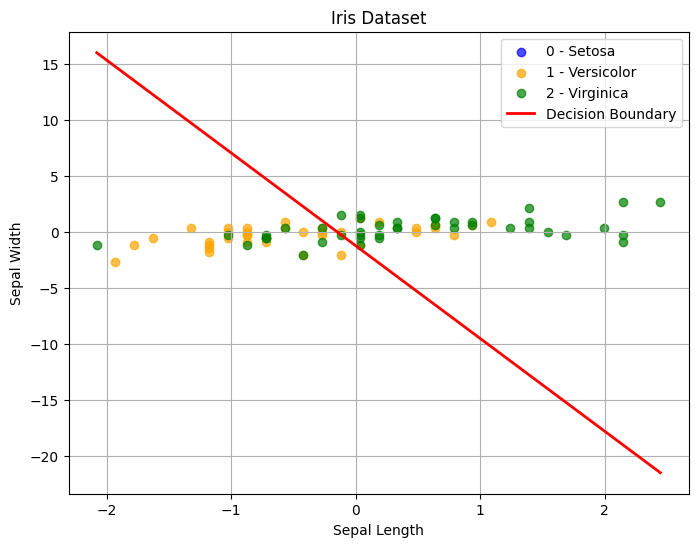

(<matplotlib.legend.Legend at 0x231ac708050>, None, None)

In [17]:
# x2 = -(coef[0]/coef[1]) * x1 - (intercept/coef[1])
x1_vals = np.linspace(iris_train_scaled_data[:, 0].min(), iris_train_scaled_data[:, 0].max(), 100)
x2_vals = -(coef[0] / coef[1]) * x1_vals - (intercept / coef[1])


plt.figure(figsize=(8, 6))
plt.scatter(iris_train_scaled_data[iris_train_target == 0][:, 0], iris_train_scaled_data[iris_train_target == 0][:, 1], color='blue', label='0 - Setosa', alpha=0.7)
plt.scatter(iris_train_scaled_data[iris_train_target == 1][:, 0], iris_train_scaled_data[iris_train_target == 1][:, 1], color='orange', label='1 - Versicolor', alpha=0.7)
plt.scatter(iris_train_scaled_data[iris_train_target == 2][:, 0], iris_train_scaled_data[iris_train_target == 2][:, 1], color='green', label='2 - Virginica', alpha=0.7)
plt.plot(x1_vals, x2_vals, color='red', linewidth=2, label='Decision Boundary')

plt.title('Iris Dataset'), plt.xlabel('Sepal Length'), plt.ylabel('Sepal Width')
plt.legend(), plt.grid(), plt.show()


### Testing the model

In [18]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(iris_test_target, logistic_regression.predict(iris_test_scaled_data))
print("Model accuracy is {0:0.2f}".format(acc))

Model accuracy is 0.80


In [19]:
from sklearn.metrics import confusion_matrix

iris_test_predictions = logistic_regression.predict(iris_test_scaled_data)

conf_matrix = confusion_matrix(iris_test_target, iris_test_predictions)
print(conf_matrix)

[[9 3]
 [1 7]]


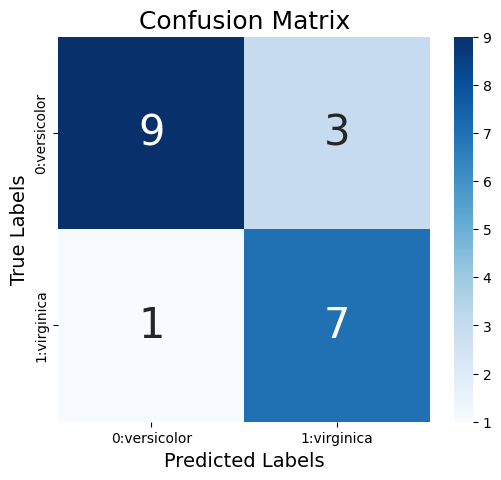

In [20]:
import seaborn as sns
plot_names = [c for c in target_names if c != target_names[dropped_class]]
plot_names = [f"{idx}:{c}" for idx, c in enumerate(plot_names)]

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues',
            xticklabels=plot_names, yticklabels=plot_names,
            annot_kws={'size': 30})

plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

$\text{Precision}={\frac {TP}{TP+FP}} \\ \\
{\text{Recall}}={\frac {TP}{TP+FN}}$

$F_{1}={\frac {2}{\mathrm {recall} ^{-1}+\mathrm {precision} ^{-1}}}=2{\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}={\frac {2\mathrm {TP} }{2\mathrm {TP} +\mathrm {FP} +\mathrm {FN} }}$

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(iris_test_target, iris_test_predictions)
recall = recall_score(iris_test_target, iris_test_predictions)
f1 = f1_score(iris_test_target, iris_test_predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.90
Recall: 0.75
F1 Score: 0.82


## [Multiclass classification](https://scikit-learn.org/stable/modules/multiclass.html) using [OneVOneClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html#sklearn.multiclass.OneVsOneClassifier)

In [22]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

x = iris.data[:, :2] # only sepal length and sepal width
y = iris.target

#Split
iris_train_data, iris_test_data, \
iris_train_target, iris_test_target = \
train_test_split(x, y, test_size=0.2)

#Scale
scaler = StandardScaler()
iris_train_scaled_data = scaler.fit_transform(iris_train_data)
iris_test_scaled_data = scaler.transform(iris_test_data)

#Fit
OvOClassifier = OneVsOneClassifier(LogisticRegression())
OvOClassifier.fit(iris_train_scaled_data, iris_train_target)

OneVsOneClassifier(estimator=LogisticRegression())

In [23]:
OvOClassifier.estimators_

(LogisticRegression(), LogisticRegression(), LogisticRegression())

In [24]:
iris_test_predictions = OvOClassifier.predict(iris_test_scaled_data)

conf_matrix = confusion_matrix(iris_test_target, iris_test_predictions)
print(conf_matrix)

[[9 0 0]
 [0 9 2]
 [0 4 6]]


In [25]:
acc = accuracy_score(iris_test_target, OvOClassifier.predict(iris_test_scaled_data))
print("Model accuracy is {0:0.2f}".format(acc))

Model accuracy is 0.80


In [26]:
f1_score(iris_test_target, iris_test_predictions, average="macro") # average F1

0.8055555555555555

# Student task

1. Plot the data and decision boundaries for all three classifiers used in the One Vs Rest strategy (on a single plot)

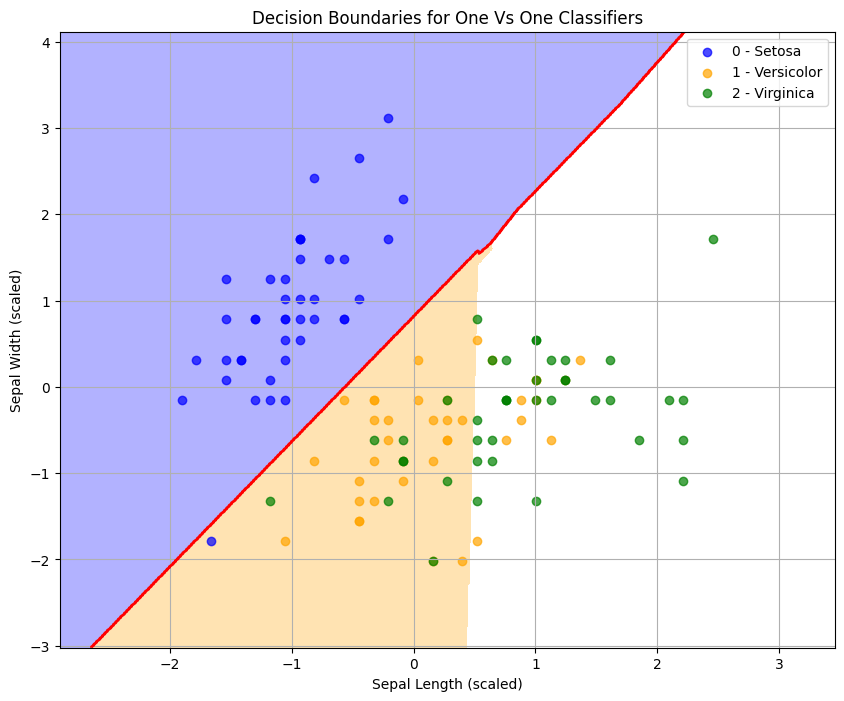

In [28]:
# Create a mesh to plot the decision boundaries
x_min, x_max = iris_train_scaled_data[:, 0].min() - 1, iris_train_scaled_data[:, 0].max() + 1
y_min, y_max = iris_train_scaled_data[:, 1].min() - 1, iris_train_scaled_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Plot the decision boundaries for each classifier
plt.figure(figsize=(10, 8))
Z = OvOClassifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1).reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=['blue', 'orange', 'green'])
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')

# Plot the training points
plt.scatter(iris_train_scaled_data[iris_train_target == 0][:, 0], iris_train_scaled_data[iris_train_target == 0][:, 1], color='blue', label='0 - Setosa', alpha=0.7)
plt.scatter(iris_train_scaled_data[iris_train_target == 1][:, 0], iris_train_scaled_data[iris_train_target == 1][:, 1], color='orange', label='1 - Versicolor', alpha=0.7)
plt.scatter(iris_train_scaled_data[iris_train_target == 2][:, 0], iris_train_scaled_data[iris_train_target == 2][:, 1], color='green', label='2 - Virginica', alpha=0.7)

plt.title('Decision Boundaries for One Vs One Classifiers')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.legend()
plt.grid(True)
plt.show()

2. Use logistic regression on the breast cancer dataset. Plot the confusion matrix, calculate accuracy and F1. Can the classifier make good predictions on this dataset?

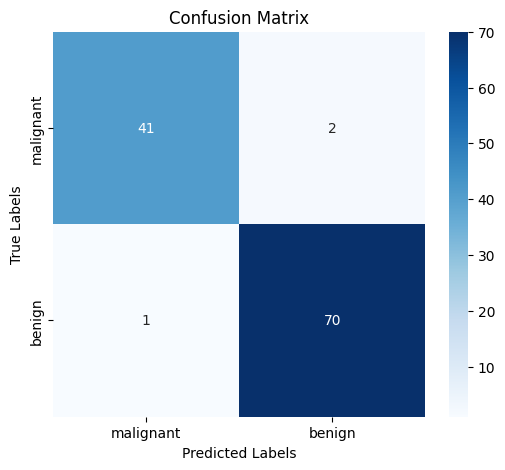

Accuracy: 0.97
F1 Score: 0.98


In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score

# Load the breast cancer dataset
cancer = load_breast_cancer()

# Split the data into training and testing sets
cancer_train_data, cancer_test_data, cancer_train_target, cancer_test_target = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
cancer_train_scaled_data = scaler.fit_transform(cancer_train_data)
cancer_test_scaled_data = scaler.transform(cancer_test_data)

# Train the logistic regression model
logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(cancer_train_scaled_data, cancer_train_target)

# Make predictions on the test set
cancer_test_predictions = logistic_regression.predict(cancer_test_scaled_data)

# Plot the confusion matrix
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(cancer_test_target, cancer_test_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate accuracy and F1 score

accuracy = accuracy_score(cancer_test_target, cancer_test_predictions)
f1 = f1_score(cancer_test_target, cancer_test_predictions)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")